In [1]:
from spectacle.modeling.models import Voigt1D, Absorption1D
from spectacle.core.spectra import Spectrum1D
from spectacle.modeling.fitting import LevMarFitter

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from astropy.io import registry as io_registry
io_registry.get_formats(Spectrum1D)

/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/astropy/table/column.py:264: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self.data.__eq__(other)


Data class,Format,Read,Write,Auto-identify
float64,float64,float64,float64,float64


In [15]:
%matplotlib notebook

In [16]:
spec_mod = Absorption1D()
spec_mod.add_line(lambda_0=1.21567010E+03, f_value=0.4164, v_doppler=1e7,
                  column_density=10**14.66, gamma=6.2650000e+08, delta_v=0,
                  delta_lambda=0)

<Voigt1D(lambda_0=1215.6701, f_value=0.4164, gamma=626500000.0, v_doppler=10000000.0, column_density=457088189614875.2, delta_v=0.0, delta_lambda=0.0, name='HI1216')>

In [17]:
new_spec = spec_mod(np.arange(2000))
new_spec.add_noise(.1)


/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/profiles.py:69: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)


array([ 0.01060946,  0.01899621,  0.05002649, ..., -0.13089951,
       -0.1205607 ,  0.08349766])

In [20]:
# Try to load data from fits file
from astropy.table import Table

tab = Table.read("/Users/nearl/projects/enzo_specs/advance_spectrum.fits")
print(tab)

# new_spec = Spectrum1D(tab['flux'], dispersion=tab['wavelength'])
print(tab.colnames)

wavelength    tau       flux   ... sim_thermal_b sim_lambda_obs
---------- ---------- -------- ... ------------- --------------
    1214.6 0.00883497 0.991204 ...   1.41215e-05        1215.67
   1214.61 0.00983408 0.990214 ...   1.41215e-05        1215.67
   1214.62  0.0109353 0.989124 ...   1.41215e-05        1215.67
   1214.63  0.0121478 0.987926 ...   1.41215e-05        1215.67
   1214.64  0.0134812 0.986609 ...   1.41215e-05        1215.67
   1214.65  0.0149461 0.985165 ...   1.41215e-05        1215.67
   1214.66  0.0165536 0.983583 ...   1.41215e-05        1215.67
   1214.67  0.0183158 0.981851 ...   1.41215e-05        1215.67
   1214.68  0.0202452 0.979958 ...   1.41215e-05        1215.67
   1214.69  0.0223556 0.977892 ...   1.41215e-05        1215.67
       ...        ...      ... ...           ...            ...
   1216.64  0.0269577 0.973402 ...           0.0            0.0
   1216.65  0.0244674  0.97583 ...           0.0            0.0
   1216.66  0.0221851 0.978059 ...      

<IPython.core.display.Javascript object>


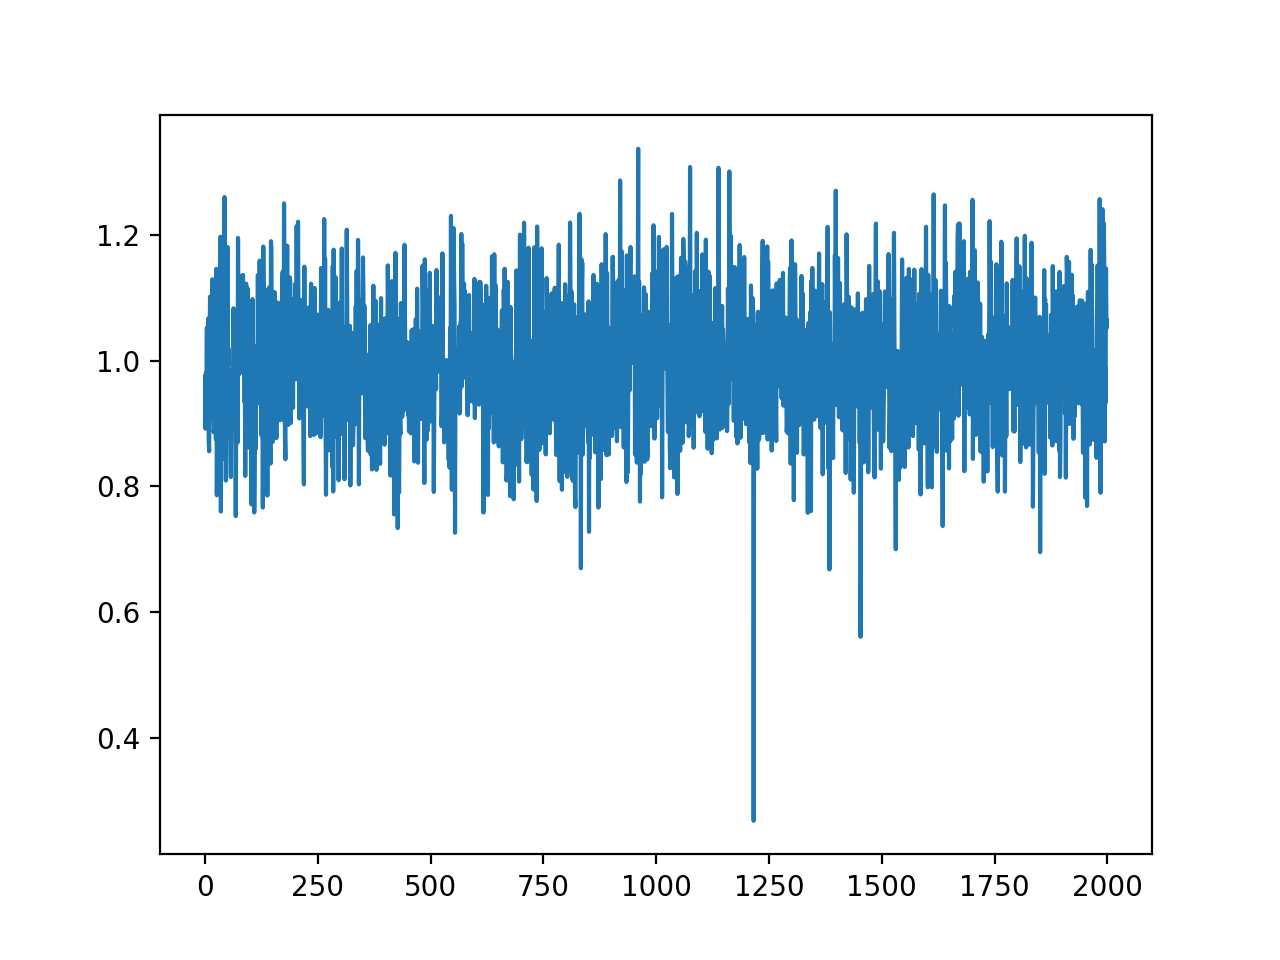

In [6]:
f, ax = plt.subplots()
ax.plot(new_spec.dispersion, new_spec.data)

<IPython.core.display.Javascript object>


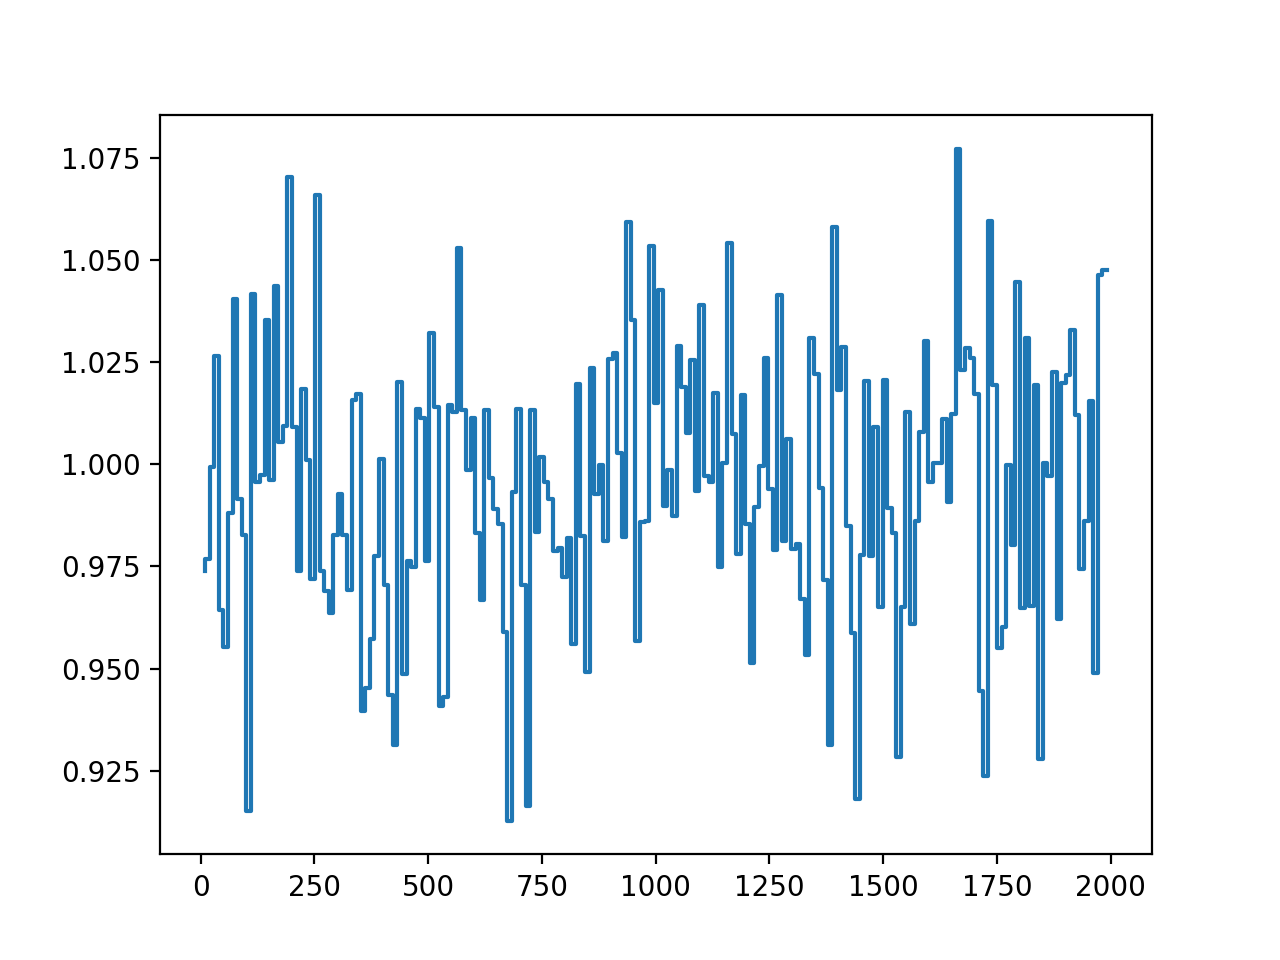

In [12]:
resamp_new_spec = new_spec.resample(np.linspace(0, 2002, 200))

f, ax = plt.subplots()
ax.step(resamp_new_spec.dispersion[1:-1], resamp_new_spec.data[1:-1])

In [8]:
ew, ew_uncert = new_spec.equivalent_width(x_0=1000)
print(ew, ew_uncert)

10.076326420205397 0.0


In [9]:
fitter = LevMarFitter(min_dist=400)
fit_spec = fitter(new_spec)

found 4 lines


/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/profiles.py:69: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)


<IPython.core.display.Javascript object>


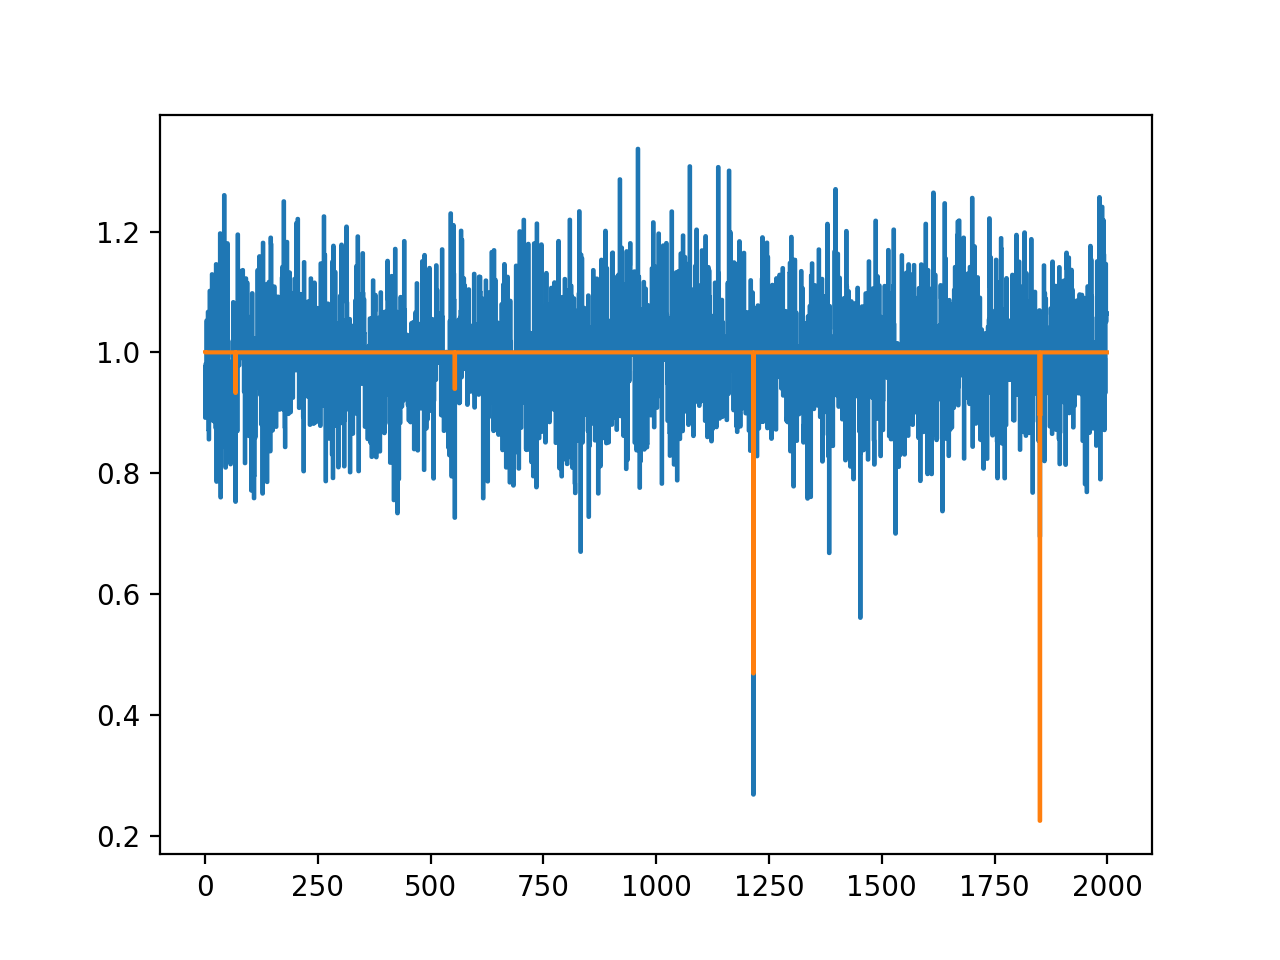

In [13]:
f, ax = plt.subplots()
ax.step(new_spec.dispersion, new_spec.data)
ax.step(fit_spec.dispersion, fit_spec.data)

In [11]:
print(fitter.fit_info)

   Parameter     Original Value    Fitted Value   Uncertainty
---------------- -------------- ----------------- -----------
         slope_0            0.0 5.59226179442e-06         0.0
     intercept_0            1.0    0.990173043323         0.0
      lambda_0_1           68.0     67.9919339289         0.0
       f_value_1          0.696               1.0         0.0
         gamma_1       3.32e+12          3.32e+12         0.0
     v_doppler_1     10000000.0     5811622.68842         0.0
column_density_1          1e+14  2.3026561836e+14         0.0
       delta_v_1            0.0 2.49359892249e-10         0.0
  delta_lambda_1            0.0               0.0         0.0
      lambda_0_2          554.0     553.927712475         0.0
             ...            ...               ...         ...
     v_doppler_3     10000000.0     8481292.84074         0.0
column_density_3          1e+14 1.58547180015e+14         0.0
       delta_v_3            0.0     7114787.34307         0.0
  delta_